1. Libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
!nvidia-smi

Tue Jun 10 13:12:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.144.03             Driver Version: 550.144.03     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650        Off |   00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8              4W /   50W |       6MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

2. Dataset :

   A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).

   The overview of this dataset is, it has 11054 samples with 32 features. 

In [3]:
#Loading data into dataframe

data = pd.read_csv("/home/anchitya-kumar/Documents/Phising_Detection/Dataset/phishing.csv")
data.head()

Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0      1            -1  ...                 1                  1   
1          -1     -1            -1  ...                 1                  1   
2          -1     -1             1  ...                 1                  1   
3           1      1            -1  ...                -1                  1   
4           1      1            -1  ...                 1                  1   

   AgeofDomain  DNSRecording  WebsiteTraffic  PageRank  GoogleIndex  \
0           -1            -1               0        -1            1   
1            1            -1               1        -1            1   
2           -1            -1               1        -1            1   
3           -1            -1               0        -1            1   
4            1             1               1        -1            1   

   LinksPointingToPage  StatsReport  class  
0                    1            1     -1  
1                    0           -1     -1  
2                   -1            1     -1  
3                    1            1      1  
4                   -1           -1      1  

[5 rows x 32 columns]

3. Familiarizing with Data & EDA:

   In this step, few dataframe methods are used to look into the data and its features.

In [4]:
print("Shape of the data: ", data.shape)
print("------->")
print("Columns in the data: ", data.columns)
print("------->")
print("Data types of the columns: ", data.dtypes)




Shape of the data:  (11054, 32)
------->
Columns in the data:  Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')
------->
Data types of the columns:  Index                  int64
UsingIP                int64
LongURL                int64
ShortURL               int64
Symbol@                int64
Redirecting//          int64
PrefixSuffix-          int64
SubDomains             int64
HTTPS                  int64
DomainRegLen           int64
Favicon                int64
NonStdPort  

In [5]:
print("Missing values in the data: ", data.isnull().sum())


Missing values in the data:  Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64


In [6]:
data.describe()

Index       UsingIP       LongURL      ShortURL       Symbol@  \
count  11054.000000  11054.000000  11054.000000  11054.000000  11054.000000   
mean    5526.500000      0.313914     -0.633345      0.738737      0.700561   
std     3191.159272      0.949495      0.765973      0.674024      0.713625   
min        0.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%     2763.250000     -1.000000     -1.000000      1.000000      1.000000   
50%     5526.500000      1.000000     -1.000000      1.000000      1.000000   
75%     8289.750000      1.000000     -1.000000      1.000000      1.000000   
max    11053.000000      1.000000      1.000000      1.000000      1.000000   

       Redirecting//  PrefixSuffix-    SubDomains         HTTPS  DomainRegLen  \
count   11054.000000   11054.000000  11054.000000  11054.000000  11054.000000   
mean        0.741632      -0.734938      0.064049      0.251040     -0.336711   
std         0.670837       0.678165      0.817492      0.911856      0.941651   
min        -1.000000      -1.000000     -1.000000     -1.000000     -1.000000   
25%         1.000000      -1.000000     -1.000000     -1.000000     -1.000000   
50%         1.000000      -1.000000      0.000000      1.000000     -1.000000   
75%         1.000000      -1.000000      1.000000      1.000000      1.000000   
max         1.000000       1.000000      1.000000      1.000000      1.000000   

       ...  UsingPopupWindow  IframeRedirection   AgeofDomain  DNSRecording  \
count  ...      11054.000000       11054.000000  11054.000000  11054.000000   
mean   ...          0.613353           0.816899      0.061335      0.377239   
std    ...          0.789845           0.576807      0.998162      0.926158   
min    ...         -1.000000          -1.000000     -1.000000     -1.000000   
25%    ...          1.000000           1.000000     -1.000000     -1.000000   
50%    ...          1.000000           1.000000      1.000000      1.000000   
75%    ...          1.000000           1.000000      1.000000      1.000000   
max    ...          1.000000           1.000000      1.000000      1.000000   

       WebsiteTraffic      PageRank   GoogleIndex  LinksPointingToPage  \
count    11054.000000  11054.000000  11054.000000         11054.000000   
mean         0.287407     -0.483626      0.721549             0.343948   
std          0.827680      0.875314      0.692395             0.569936   
min         -1.000000     -1.000000     -1.000000            -1.000000   
25%          0.000000     -1.000000      1.000000             0.000000   
50%          1.000000     -1.000000      1.000000             0.000000   
75%          1.000000      1.000000      1.000000             1.000000   
max          1.000000      1.000000      1.000000             1.000000   

        StatsReport         class  
count  11054.000000  11054.000000  
mean       0.719739      0.113986  
std        0.694276      0.993527  
min       -1.000000     -1.000000  
25%        1.000000     -1.000000  
50%        1.000000      1.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000  

[8 rows x 32 columns]

4. Visualizing the data:

   Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

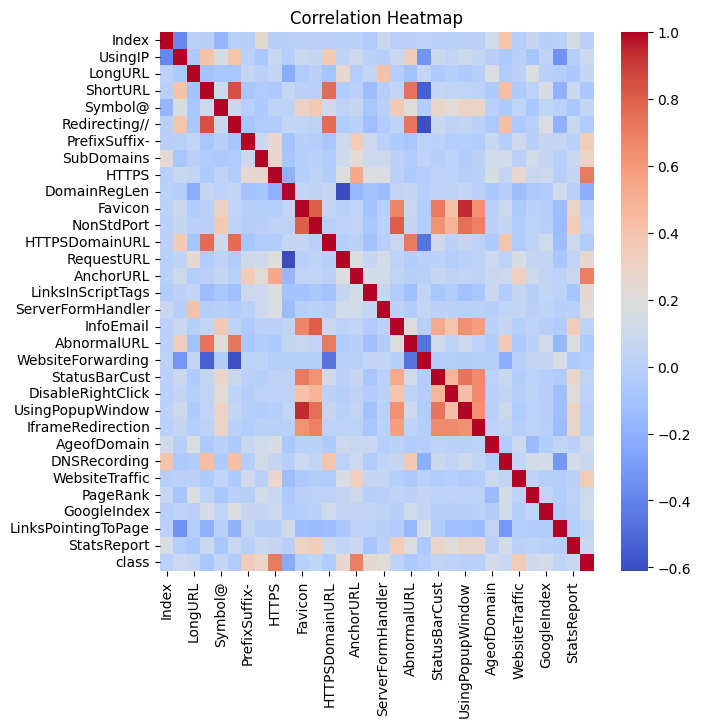

In [7]:
plt.figure(figsize =(7,7))
sns.heatmap(data.corr(), cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
selected_cols = [
    'WebsiteTraffic',
    'GoogleIndex',
    'PageRank',
    'UsingPopupWindow',
    'AbnormalURL',
    'StatusBarCust',
    'class'  # include target for hue
]




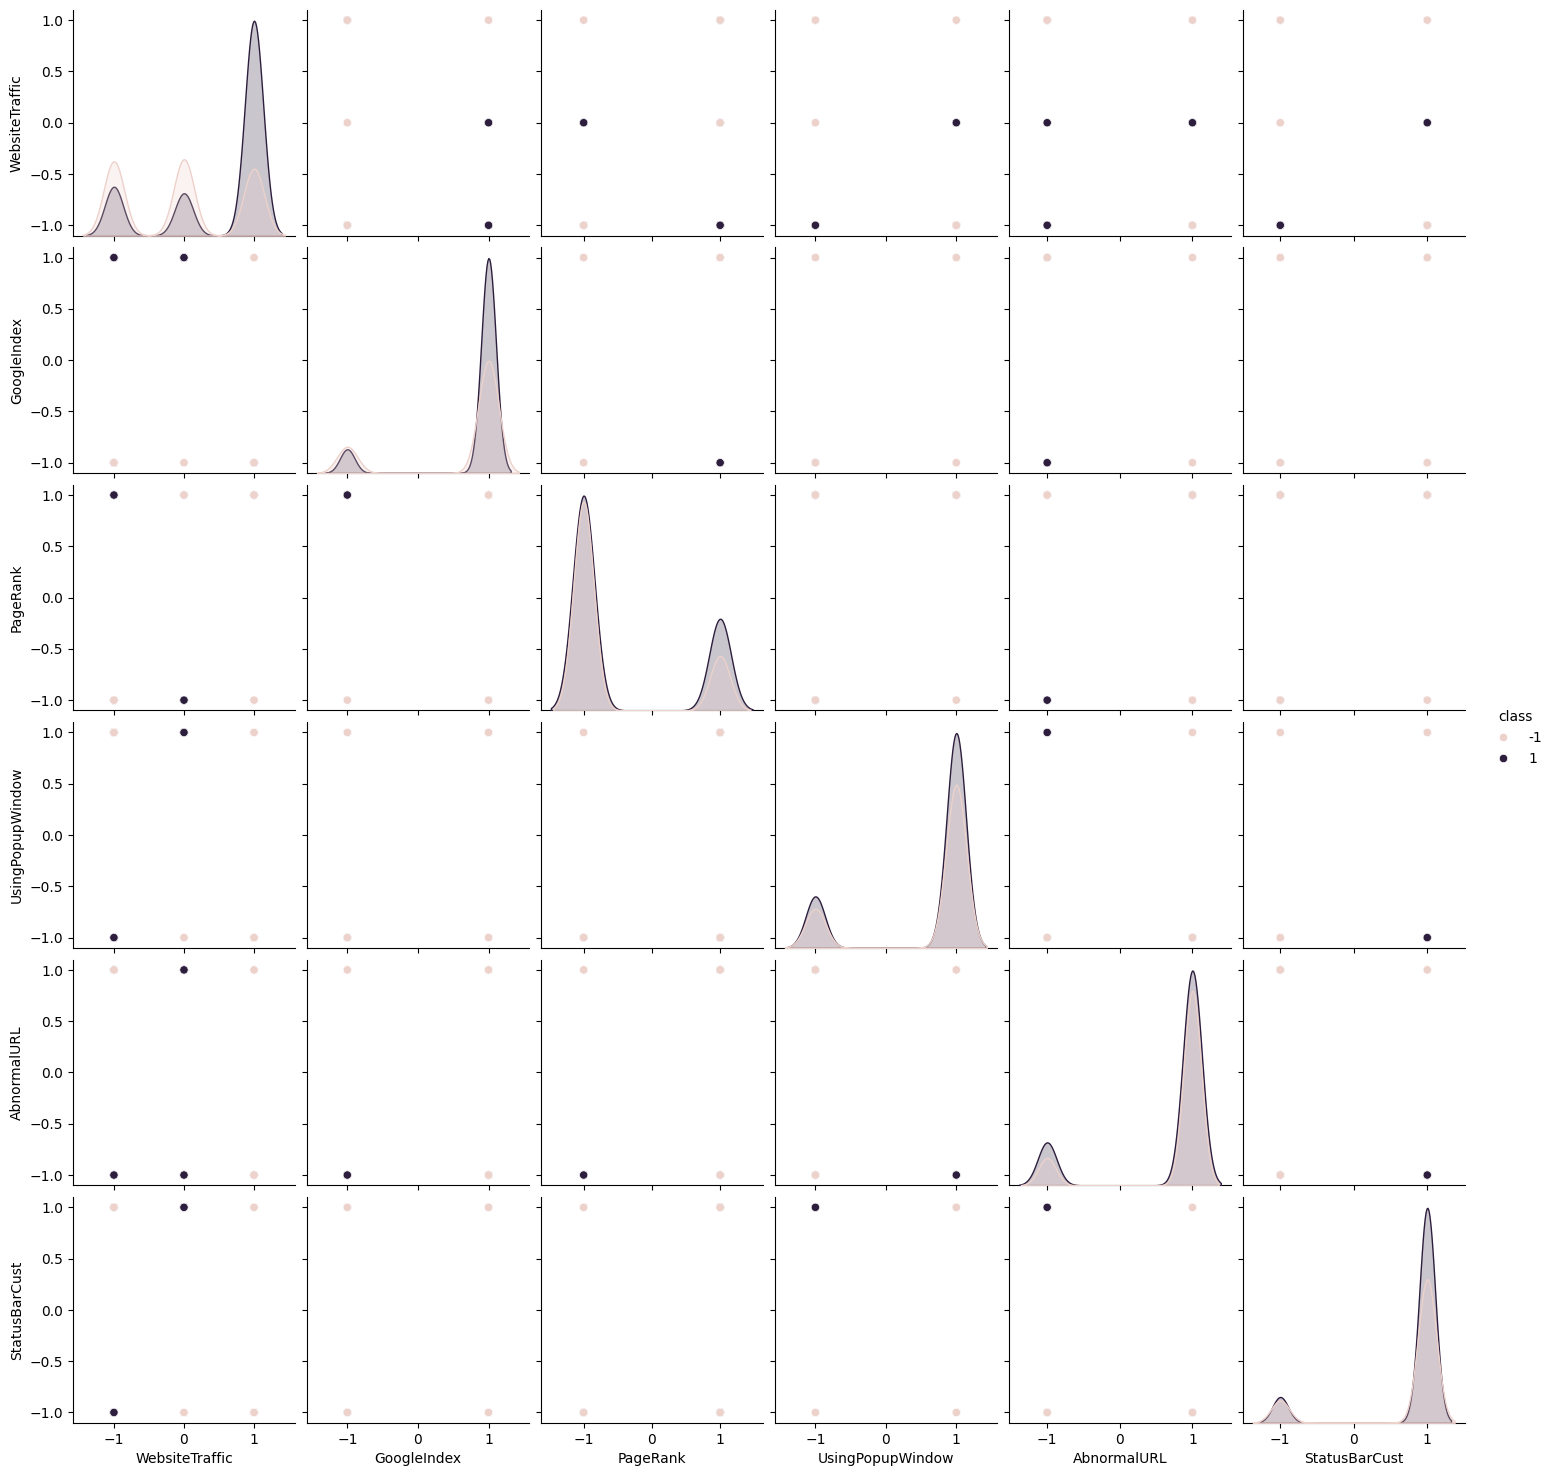

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[selected_cols], hue='class')
plt.show()

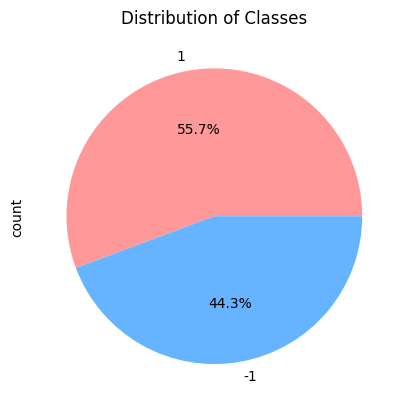

In [10]:
# Phishing Count in pie chart
data['class'].value_counts().plot(kind='pie' ,colors = ['#ff9999','#66b3ff'] ,autopct='%1.1f%%')
plt.title('Distribution of Classes')
plt.show()

5. Splitting the Data:

   The data is split into train & test sets, 80-20 split.

In [11]:
# Splitting the dataset into dependant and independant fetature
y = data['class']
X = data.drop(['class','Index'],axis=1)
X.shape, y.shape

((11054, 30), (11054,))

In [12]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

6. Model Building & Training:

    Logistic Regression

    k-Nearest Neighbors

    Support Vector Clasifier

    Naive Bayes

    Decision Tree

    Random Forest

    Gradient Boosting

    Xgboost

    Multilayer Perceptrons

In [13]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [14]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [15]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [16]:
#Computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934

Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941

Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.953

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.930


In [17]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [18]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_test_log,precision_score_test_log)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)
# fit the model
knn.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [20]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("K-Nearest Neighbors : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.964
K-Nearest Neighbors : Accuracy on test Data: 0.940

K-Nearest Neighbors : f1_score on training Data: 0.968
K-Nearest Neighbors : f1_score on test Data: 0.946

K-Nearest Neighbors : Recall on training Data: 0.971
K-Nearest Neighbors : Recall on test Data: 0.950

K-Nearest Neighbors : precision on training Data: 0.965
K-Nearest Neighbors : precision on test Data: 0.943


In [21]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.94      0.93      0.93       976
           1       0.94      0.95      0.95      1235

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



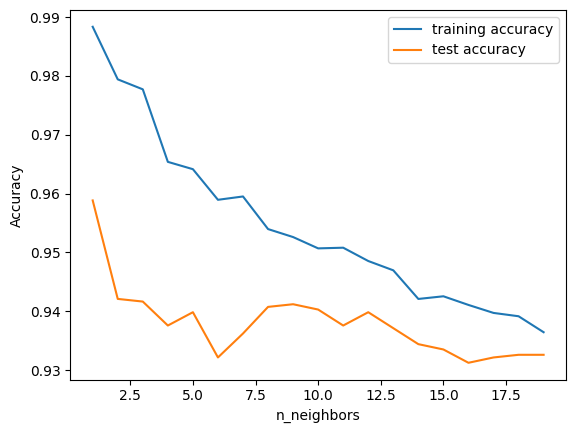

In [22]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

In [23]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_test_knn,precision_score_test_knn)

In [24]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid , cv =3 , n_jobs = -1)

# fitting the model for grid search
svc.fit(X_train, y_train) 

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [25]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test) 

In [26]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [27]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [28]:

#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_test_svc,precision_score_test_svc) 

In [29]:
# importing Naive bayes
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train,y_train)
#predicting the target value from the model for the samples
y_train_gnb = gnb.predict(X_train)
y_test_gnb = gnb.predict(X_test)



In [30]:
#Computing the accuracy, f1_score, Recall, precision of the model performance
acc_train_gnb = metrics.accuracy_score(y_train,y_train_gnb)
acc_test_gnb = metrics.accuracy_score(y_test,y_test_gnb)
print("Naive Based Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gnb))
print("Naive Based Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gnb))


f1_score_train_gnb = metrics.f1_score(y_train,y_train_gnb)
f1_score_test_gnb = metrics.f1_score(y_test,y_test_gnb)
print("Naive Based Classifier  : f1_score on training Data: {:.3f}".format(f1_score_train_gnb))
print("Naive Based Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gnb))


recall_score_train_gnb = metrics.recall_score(y_train,y_train_gnb)
recall_score_test_gnb = metrics.recall_score(y_test,y_test_gnb)
print("Naive Based CLassifier : Recall on training Data: {:.3f}".format(recall_score_train_gnb))
print("Naive Based Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gnb))


precision_score_train_gnb = metrics.precision_score(y_train,y_train_gnb)
precision_score_test_gnb = metrics.precision_score(y_test,y_test_gnb)
print("Naive Based Classifier: precision on training Data: {:.3f}".format(precision_score_train_gnb))
print("Naive Based Classifier : precision on test Data: {:.3f}".format(precision_score_test_gnb))

Naive Based Classifier : Accuracy on training Data: 0.605
Naive Based Classifier : Accuracy on test Data: 0.605
Naive Based Classifier  : f1_score on training Data: 0.451
Naive Based Classifier : f1_score on test Data: 0.454
Naive Based CLassifier : Recall on training Data: 0.292
Naive Based Classifier : Recall on test Data: 0.294
Naive Based Classifier: precision on training Data: 0.997
Naive Based Classifier : precision on test Data: 0.995


In [31]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_gnb))

              precision    recall  f1-score   support

          -1       0.53      1.00      0.69       976
           1       0.99      0.29      0.45      1235

    accuracy                           0.60      2211
   macro avg       0.76      0.65      0.57      2211
weighted avg       0.79      0.60      0.56      2211



In [32]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Naive based Classifier',acc_test_gnb,f1_score_test_gnb,
             recall_score_train_gnb,precision_score_train_gnb)

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_train_dec = clf. predict(X_train)
y_test_dec  = clf.predict(X_test)


In [34]:
from sklearn import metrics


#Computing the accuracy, f1_score, Recall, precision of the model performance
acc_train_dec= metrics.accuracy_score(y_train,y_train_dec)
acc_test_dec = metrics.accuracy_score(y_test,y_test_dec)
print("DecisionTree Based Classifier : Accuracy on training Data: {:.3f}".format(acc_train_dec))
print("DecisionTree Based Classifier : Accuracy on test Data: {:.3f}".format(acc_test_dec))


f1_score_train_dec = metrics.f1_score(y_train,y_train_dec)
f1_score_test_dec = metrics.f1_score(y_test,y_test_dec)
print("DecisionTree Based Classifier  : f1_score on training Data: {:.3f}".format(f1_score_train_dec))
print("DecisionTree Based Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_dec))


recall_score_train_dec = metrics.recall_score(y_train,y_train_dec)
recall_score_test_dec = metrics.recall_score(y_test,y_test_dec)
print("DecisionTree Based CLassifier : Recall on training Data: {:.3f}".format(recall_score_train_dec))
print("DecisionTree Based Classifier : Recall on test Data: {:.3f}".format(recall_score_test_dec))


precision_score_train_dec = metrics.precision_score(y_train,y_train_dec)
precision_score_test_dec = metrics.precision_score(y_test,y_test_dec)
print("DecisionTree Based Classifier: precision on training Data: {:.3f}".format(precision_score_train_dec))
print("DecisionTree Based Classifier : precision on test Data: {:.3f}".format(precision_score_test_dec))

DecisionTree Based Classifier : Accuracy on training Data: 0.991
DecisionTree Based Classifier : Accuracy on test Data: 0.960
DecisionTree Based Classifier  : f1_score on training Data: 0.992
DecisionTree Based Classifier : f1_score on test Data: 0.964
DecisionTree Based CLassifier : Recall on training Data: 0.991
DecisionTree Based Classifier : Recall on test Data: 0.961
DecisionTree Based Classifier: precision on training Data: 0.993
DecisionTree Based Classifier : precision on test Data: 0.967


In [35]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_dec))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.96       976
           1       0.97      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [36]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('decision Tree based Classifier',acc_test_dec,f1_score_test_dec,
             recall_score_train_dec,precision_score_train_dec)

In [37]:
ML_Model

['Logistic Regression',
 'K-Nearest Neighbors',
 'Support Vector Machine',
 'Naive based Classifier',
 'decision Tree based Classifier']

In [38]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# fit the model
rf.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_train_rf = rf.predict(X_train)    
y_test_rf = rf.predict(X_test)

In [39]:
from sklearn import metrics


#Computing the accuracy, f1_score, Recall, precision of the model performance
acc_train_rf= metrics.accuracy_score(y_train,y_train_rf)
acc_test_rf = metrics.accuracy_score(y_test,y_test_rf)
print("RandmForest Based Classifier : Accuracy on training Data: {:.3f}".format(acc_train_rf))
print("RandomForest Based Classifier : Accuracy on test Data: {:.3f}".format(acc_test_rf))


f1_score_train_rf = metrics.f1_score(y_train,y_train_rf)
f1_score_test_rf = metrics.f1_score(y_test,y_test_rf)
print("RandomForest Based Classifier  : f1_score on training Data: {:.3f}".format(f1_score_train_rf))
print("RandomForest Based Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_rf))


recall_score_train_rf = metrics.recall_score(y_train,y_train_rf)
recall_score_test_rf = metrics.recall_score(y_test,y_test_rf)
print("RandomForest Based CLassifier : Recall on training Data: {:.3f}".format(recall_score_train_rf))
print("RandomForest Based Classifier : Recall on test Data: {:.3f}".format(recall_score_test_rf))


precision_score_train_rf = metrics.precision_score(y_train,y_train_rf)
precision_score_test_rf = metrics.precision_score(y_test,y_test_rf)
print("RandomForest Based Classifier: precision on training Data: {:.3f}".format(precision_score_train_rf))
print("RandomForest Based Classifier : precision on test Data: {:.3f}".format(precision_score_test_rf))

RandmForest Based Classifier : Accuracy on training Data: 0.991
RandomForest Based Classifier : Accuracy on test Data: 0.969
RandomForest Based Classifier  : f1_score on training Data: 0.992
RandomForest Based Classifier : f1_score on test Data: 0.973
RandomForest Based CLassifier : Recall on training Data: 0.993
RandomForest Based Classifier : Recall on test Data: 0.977
RandomForest Based Classifier: precision on training Data: 0.991
RandomForest Based Classifier : precision on test Data: 0.969


In [40]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_rf))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [41]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('randomforest based Classifier',acc_test_rf,f1_score_test_rf,
             recall_score_train_rf,precision_score_train_rf)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)


# Predict and evaluate
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)



In [43]:
from sklearn import metrics


#Computing the accuracy, f1_score, Recall, precision of the model performance
acc_train_gbc= metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))


f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))


recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc = metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier: Recall on test Data: {:.3f}".format(recall_score_test_gbc))


precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier: precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier: precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.951
Gradient Boosting Classifier : Accuracy on test Data: 0.949
Gradient Boosting Classifier : f1_score on training Data: 0.957
Gradient Boosting Classifier : f1_score on test Data: 0.955
Gradient Boosting Classifier : Recall on training Data: 0.966
Gradient Boosting Classifier: Recall on test Data: 0.962
Gradient Boosting Classifier: precision on training Data: 0.947
Gradient Boosting Classifier: precision on test Data: 0.948


In [44]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94       976
           1       0.95      0.96      0.95      1235

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



In [45]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('GradientBoost based Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [46]:
storeResults

<function __main__.storeResults(model, a, b, c, d)>

In [47]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)



# Convert labels from -1, 1 to 0, 1
X_train = (X_train == 1).astype(int)
X_test = (X_test == 1).astype(int)

# Convert labels from -1, 1 to 0, 1
y_train = (y_train == 1).astype(int)
y_test = (y_test == 1).astype(int)

# Train the model
xgb.fit(X_train, y_train)


# Predict and evaluate
y_train_xgb= xgb.predict(X_train)
y_test_xgb= xgb.predict(X_test)

In [48]:
from sklearn import metrics


#Computing the accuracy, f1_score, Recall, precision of the model performance
acc_train_xgb= metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XgBoost Classifier: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XgBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))


f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XgBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XgBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))


recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XgBoost Classifier: Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XgBoost Classifier: Recall on test Data: {:.3f}".format(recall_score_test_xgb))


precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XgBoost Classifier: precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XgBoost Classifier: precision on test Data: {:.3f}".format(precision_score_test_xgb))

XgBoost Classifier: Accuracy on training Data: 0.968
XgBoost Classifier : Accuracy on test Data: 0.959
XgBoost Classifier : f1_score on training Data: 0.971
XgBoost Classifier : f1_score on test Data: 0.963
XgBoost Classifier: Recall on training Data: 0.970
XgBoost Classifier: Recall on test Data: 0.966
XgBoost Classifier: precision on training Data: 0.972
XgBoost Classifier: precision on test Data: 0.961


In [49]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       976
           1       0.95      0.96      0.95      1235

    accuracy                           0.54      2211
   macro avg       0.32      0.32      0.32      2211
weighted avg       0.53      0.54      0.53      2211



In [50]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('XgBoost based Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [51]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [52]:
from torch.utils.data import TensorDataset


In [53]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train = torch.randn(100, 20)     # 100 samples, 20 features
y_train = torch.randint(0, 2, (100,))  # 100 labels (binary)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# test loader
X_test = torch.randn(20, 20)     # 20 samples, 20 features  
y_test = torch.randint(0, 2, (20,))  # 20 labels (binary)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


for x_batch, y_batch in train_loader:
    print(x_batch.shape, y_batch.shape)
    break



torch.Size([64, 20]) torch.Size([64])


In [54]:
import torch.optim as optim


In [55]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [56]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

# Comparision of Models

To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [57]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 1.000
Multi-layer Perceptron : Accuracy on test Data: 0.500

Multi-layer Perceptron : f1_score on training Data: 1.000
Multi-layer Perceptron : f1_score on test Data: 1.000

Multi-layer Perceptron : Recall on training Data: 1.000
Multi-layer Perceptron : Recall on test Data: 0.375

Multi-layer Perceptron : precision on training Data: 1.000
Multi-layer Perceptron : precision on test Data: 0.375


In [58]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

In [59]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [60]:
result 

ML Model  Accuracy  f1_score  Recall  Precision
0             Logistic Regression     0.934     0.941   0.953      0.930
1             K-Nearest Neighbors     0.940     0.946   0.950      0.943
2          Support Vector Machine     0.964     0.968   0.980      0.957
3          Naive based Classifier     0.605     0.454   0.292      0.997
4  decision Tree based Classifier     0.960     0.964   0.991      0.993
5   randomforest based Classifier     0.969     0.973   0.993      0.991
6  GradientBoost based Classifier     0.949     0.955   0.966      0.947
7        XgBoost based Classifier     0.949     0.955   0.966      0.947
8          Multi-layer Perceptron     0.500     0.375   1.000      1.000

In [61]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [63]:
# Saving the random forest model 
import pickle
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)  